# <p style="background-color:grey;font-family:newtimeroman;color:#D5CABD;font-size:100%;text-align:center;border-radius:20px 60px;">SPAM MAIL PREDICTION</p>


<center><img src = 'spamMail.gif'></center>
<hr>

#### Importing Necessary Dependencies

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics as mat
from nltk import ngrams

pd.options.mode.chained_assignment = None

## <p style="font-family:newtimeroman;color:#627D78;font-size:100%;text-align:center;">1. Reading Data from CSV</p>

Here I am also creating some random null cells for data cleaning.

In [2]:
data = pd.read_csv('mail_data.csv')

In [3]:
# BASIC DATA DESCRIPTION
print("BASIC DATA DESCIRPTION", '-'*22, sep = '\n')
dataRow, dataCol = data.shape
print(f'The shape of the data: {dataRow} x {dataCol}\n')
print(data.isnull().sum(), end ='\n\n')
data.info()

BASIC DATA DESCIRPTION
----------------------
The shape of the data: 5572 x 2

Category    0
Message     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The following slider will signify the number of random null value that will be generated.

In [4]:
totalNullGenerated = 57

In [5]:
# CREATING NULL VALUES
for _ in range(totalNullGenerated):
    delCol = random.choice(data.columns)
    delRow = random.randint(0, dataRow)
    data[delCol][delRow] = np.nan
print(f"{totalNullGenerated} Null cells created")
dataVisualize = data.copy()

57 Null cells created


## <p style="font-family:newtimeroman;color:#627D78;font-size:100%;text-align:center;">2. Visualization</p>

### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">2.1 Correlation Matrix</p>


          Category   Message
Category  1.000000  0.019046
Message   0.019046  1.000000


[Text(0.5, 0, 'Category'), Text(1.5, 0, 'Message')]

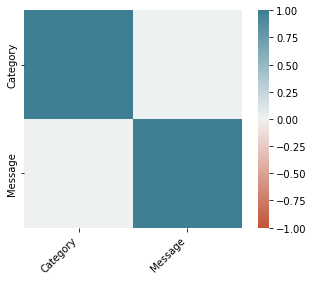

In [6]:
dataVisualize2 = dataVisualize.copy()
dataVisualize2['Category']=dataVisualize2['Category'].astype('category').cat.codes
dataVisualize2['Message']=dataVisualize2['Message'].astype('category').cat.codes
corrMatrix = dataVisualize2.corr()
print(corrMatrix)
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">2.2 Null Data Visualization</p>


In [7]:
# TOTAL NULL CELLS IN CALUMNS
dataVisualize.isnull().sum()

Category    19
Message     37
dtype: int64

In [8]:
dataVisualize

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">2.3 Data Visualization of Category Column(Pie Chart)</p>


In [9]:
dataVisualize["Category"].fillna("None", inplace = True)

In [10]:
print('Total type of Value in Category')
set(dataVisualize['Category'])

Total type of Value in Category


{'None', 'ham', 'spam'}

In [11]:
dataVisualize['Category'].value_counts()

ham     4807
spam     746
None      19
Name: Category, dtype: int64

<AxesSubplot:ylabel='Category'>

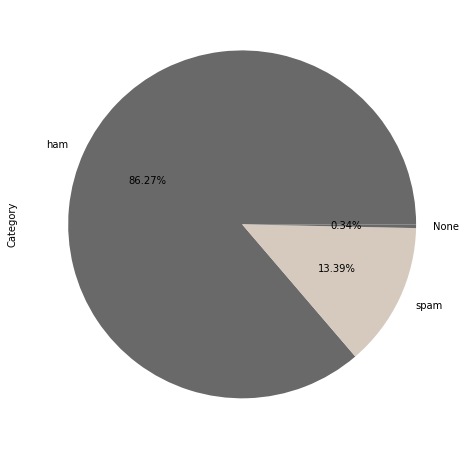

In [12]:
# Percentage of Category Values
dataVisualize['Category'].value_counts().plot(kind='pie', autopct='%1.2f%%', 
                                                colors= ['dimgrey', '#D5CABD'], figsize=(8, 8))


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">2.4 Data Visualization of Message Column of Spam(Word Cloud)</p>


In [13]:
dataVisualize["Message"].fillna("", inplace = True)

In [14]:
dataVisualize.query("Category == 'spam'")

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


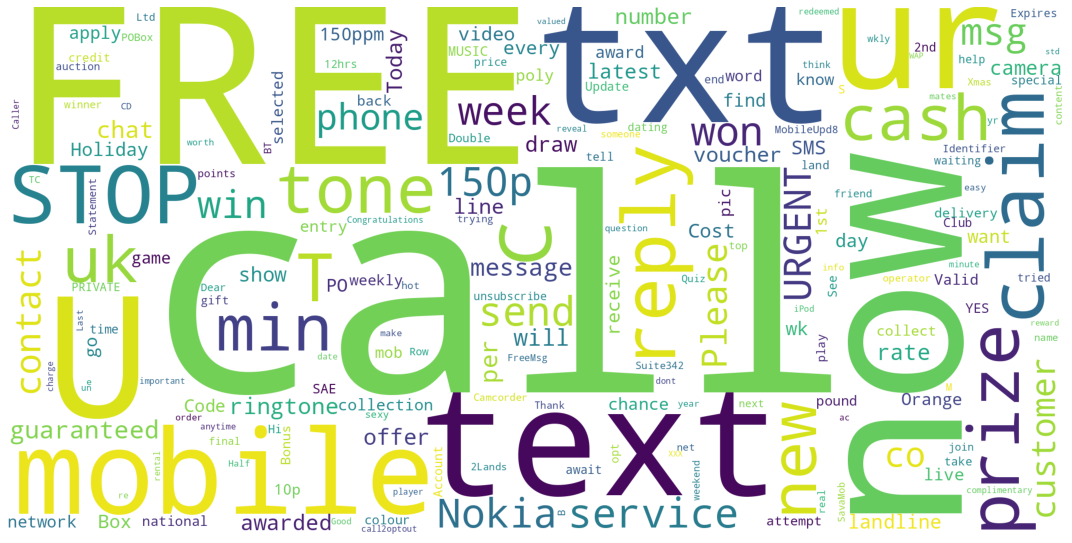

In [15]:
messageJoined = " ".join(dataVisualize.query("Category == 'spam'")["Message"].tolist())

word_cloud = WordCloud(
        width=2000,
        height=1000,
        random_state=1,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(messageJoined)

# plot the WordCloud image                      
plotter.figure(figsize = (15, 15), facecolor = None)
plotter.imshow(word_cloud)
plotter.axis("off")
plotter.tight_layout()
 
plotter.show()

### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">2.5 Data Visualization of Message Length of Spam Mail(Histogram)</p>


In [16]:
dataVisualize['Length'] = dataVisualize['Message'].str.len()

In [17]:
print(f'''Max Length: {max(dataVisualize.query("Category == 'spam'")['Length'])}
Min Length: {min(dataVisualize.query("Category == 'spam'")['Length'])}''')

Max Length: 223
Min Length: 0


Length vs Density
/shared-libs/python3.10/py/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.10/py/lib/python3.10/site-packages/seaborn/distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


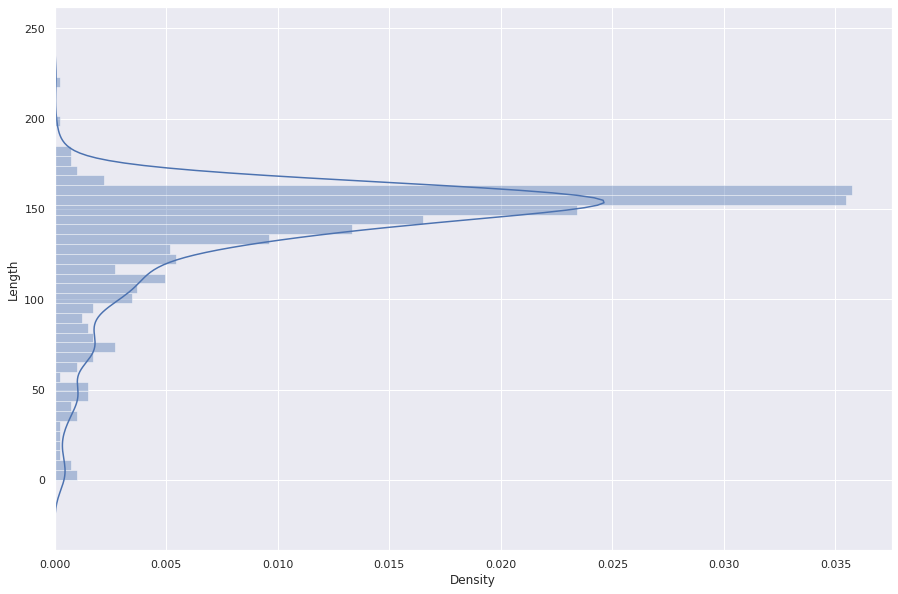

In [18]:
# Plotting 'Length vs Density' graph of Spam Data

print('Length vs Density')
sns.set(rc = {'figure.figsize':(15,10)});
sns.distplot(a= dataVisualize.query("Category == 'spam'")["Length"], hist=True, kde=True,
                    vertical = True, 
                    label = 'Length vs Density');

## <p style="font-family:newtimeroman;color:#627D78;font-size:100%;text-align:center;">3. Data Pre-processing</p>


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">3.1 Null/empty cell removal</p>

In [19]:
data = data.dropna()
dataRow, dataCol = data.shape
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [20]:
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">3.2 Clearing Message data</p>
1. move to lower case letters
2. removing punctuactions
3. replace category column with readable intager value
>> ham   => 0 || Signifies mails that are marked as non-spam mails
>> spam => 1 || Signifies mails thay are marked as spam mails
4. converting the mail texts to a vector

In [21]:
# 1. Converting to Lower Case 
data['clearMail'] = data['Message'].str.lower()

# 2. Removing Punctionation
data['clearMail'] = data['clearMail'].str.replace(r'[^\w\s]+', '', regex = True)

# 3. Converting category data
# ham -> 0
# spam -> 1
data.loc[data['Category'] == 'ham', 'Category'] = 0
data.loc[data['Category'] == 'spam', 'Category'] = 1

In [22]:
data.dtypes

Category     object
Message      object
clearMail    object
dtype: object

In [23]:
data

,Category,Message,clearMail
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


In [24]:
# 4. Splitting data in 85% train and 15% test data randomly
x_train, x_test, y_train, y_test = train_test_split(data['clearMail'], data['Category'], train_size = 0.80, shuffle = True, stratify=data['Category'])
print(f'''Train Data
----------
Input email       => x_train: {len(x_train)}  || random 80% of vectorized 
Presetted Output  => y_train: {len(y_train)}  || tupled 80% of category

Test Data
---------
Input email       => x_test: {len(x_test)}  || random 20% of vectorized 
Presetted Output  => y_test: {len(y_test)}  || tupled 20% of category
''')

Train Data
----------
Input email       => x_train: 4412  || random 80% of vectorized 
Presetted Output  => y_train: 4412  || tupled 80% of category

Test Data
---------
Input email       => x_test: 1104  || random 20% of vectorized 
Presetted Output  => y_test: 1104  || tupled 20% of category



In [25]:
# 5. Vectorizing
vectorization = tfidf(min_df = 1, stop_words='english', lowercase='True')

x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

# convert Y_train and Y_test values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

## <p style="font-family:newtimeroman;color:#627D78;font-size:100%;text-align:center;">4. Model-Training and Result Analysis</p>


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">4.1 Logistic Regression</p>


In [26]:
# Taining Model of logistic regration
trainedModel_LogisticRegration = LogisticRegression().fit(x_train,y_train)

Confusion Matrix 
--------------------
[[954  50]
 [  1  99]]


<AxesSubplot:>

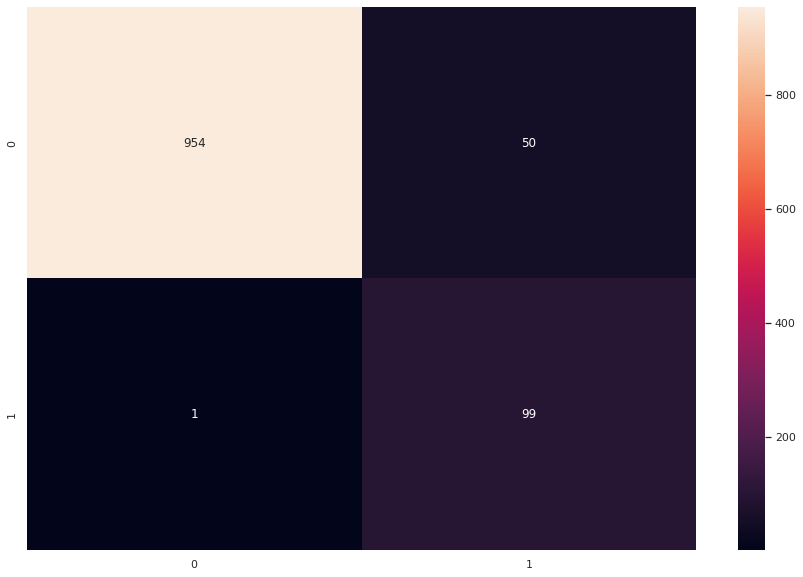

In [27]:
conf = confusion_matrix(trainedModel_LogisticRegration.predict(x_test), y_test)
print(f'Confusion Matrix \n{"-"*20}')
print(conf)
sns.heatmap(conf, fmt='', annot=True)

In [28]:
print(classification_report(y_test, trainedModel_LogisticRegration.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       955
           1       0.99      0.66      0.80       149

    accuracy                           0.95      1104
   macro avg       0.97      0.83      0.88      1104
weighted avg       0.96      0.95      0.95      1104



In [29]:
# AUC Calculation
y_probability = trainedModel_LogisticRegration.predict_proba(x_test)[::,1]
auc_value = mat.roc_auc_score(y_test, y_probability)
print(f'AUC: {auc_value}')

AUC: 0.9841104747180154


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">4.2 SVC: Support Vector Classifier</p>


In [30]:
trainedModel_SVC = SVC(kernel='rbf', probability=True).fit(x_train, y_train)

Confusion Matrix 
--------------------
[[952  23]
 [  3 126]]


<AxesSubplot:>

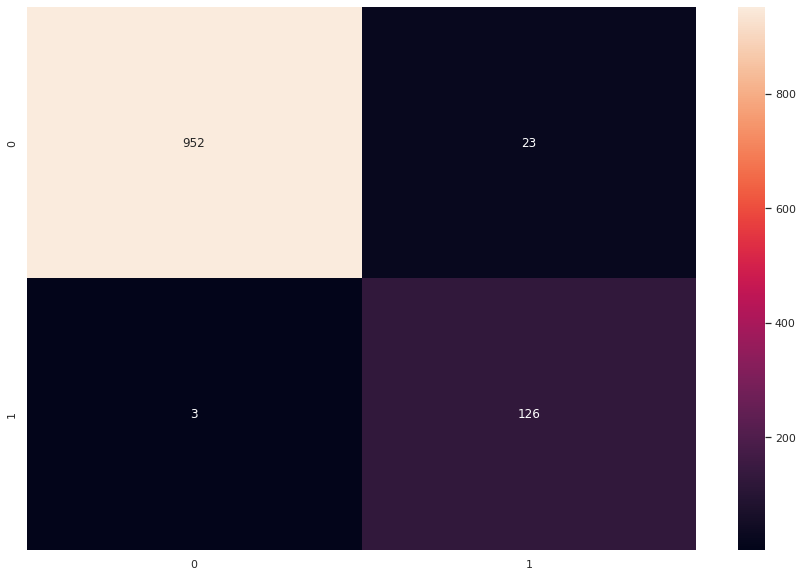

In [31]:
conf = confusion_matrix(trainedModel_SVC.predict(x_test), y_test)
print(f'Confusion Matrix \n{"-"*20}')
print(conf)
sns.heatmap(conf, fmt='', annot=True)

In [32]:
print(classification_report(y_test, trainedModel_SVC.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1104
   macro avg       0.98      0.92      0.95      1104
weighted avg       0.98      0.98      0.98      1104



In [33]:
# AUC Calculation
y_probability = trainedModel_SVC.predict_proba(x_test)[::,1]
auc_value = mat.roc_auc_score(y_test, y_probability)
print(f'AUC: {auc_value}')

AUC: 0.9867880108225869


### <p style="font-family:newtimeroman;color:#Black;font-size:80%;text-align:left;">4.3 Naive Bayes</p>

In [34]:
# Training Naieve Bias Model
trainedMOdel_NB = ComplementNB().fit(x_train,y_train)

Confussion Matrix 
--------------------
[[925  13]
 [ 30 136]]


<AxesSubplot:>

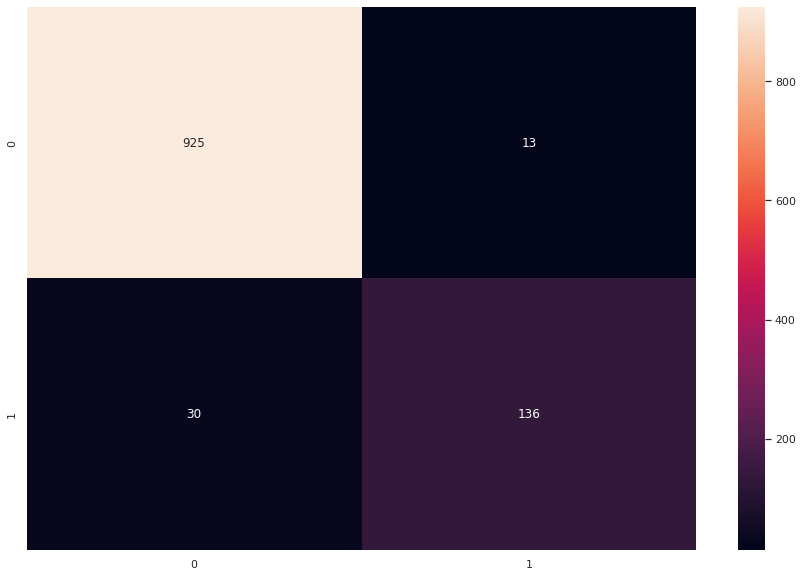

In [35]:
# Confussion Matrix Calculation
conf = confusion_matrix(trainedMOdel_NB.predict(x_test), y_test)
print(f'Confussion Matrix \n{"-"*20}')
print(conf)
sns.heatmap(conf, fmt='', annot=True)

In [36]:
# Precision Recall f1-score
print(classification_report(y_test, trainedMOdel_NB.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       955
           1       0.82      0.91      0.86       149

    accuracy                           0.96      1104
   macro avg       0.90      0.94      0.92      1104
weighted avg       0.96      0.96      0.96      1104



In [37]:
# AUC Calculation
y_probability = trainedMOdel_NB.predict_proba(x_test)[::,1]
auc_value = mat.roc_auc_score(y_test, y_probability)
print(f'AUC: {auc_value}')

AUC: 0.9807723391545732


# <p style="background-color:grey;font-family:newtimeroman;color:#D5CABD;font-size:100%;text-align:center;border-radius:20px 60px;">END OF FILE</p>


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com/workspace/saadat-rafid-ahmed-417daec3-e286-4952-bee1-25302eb6b2dc/project/spamMailClassifiershared-ddfd30db-b52b-4512-b432-3cec70432086/%2Fmain.ipynb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>